# Test to read Filters,  Optical Throughput data and CCD-QE
=========================================================================================


- author Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : May 27th 2017


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Bad value in file 'matplotlibrc', line 38 ('backend      : Qt4Agg'): Key backend: 'qt4agg' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [2]:
import pandas as pd

In [3]:
import pandas as pd
import os
import re

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Few file definitions

In [5]:
files_idealfilters=['fdata/ideal_u.txt','fdata/ideal_g.txt','fdata/ideal_r.txt','fdata/ideal_i.txt','fdata/ideal_z.txt','fdata/ideal_y4.txt']

In [6]:
file_lsstoptccd='fdata/LSST-ThroughputCCD.xlsx'

# Read Filter data

In [7]:
NBFILES=len(files_idealfilters)

In [8]:
data_u=np.loadtxt(files_idealfilters[0],skiprows=2)
data_g=np.loadtxt(files_idealfilters[1],skiprows=2)
data_r=np.loadtxt(files_idealfilters[2],skiprows=2)
data_i=np.loadtxt(files_idealfilters[3],skiprows=2)
data_z=np.loadtxt(files_idealfilters[4],skiprows=2)
data_y4=np.loadtxt(files_idealfilters[5],skiprows=2)

In [9]:
wl_u=data_u[:,0]
u=data_u[:,1]
#
wl_g=data_g[:,0]
g=data_g[:,1]
#
wl_r=data_r[:,0]
r=data_r[:,1]
#
wl_i=data_i[:,0]
i=data_i[:,1]
#
wl_z=data_z[:,0]
z=data_z[:,1]
#
wl_y4=data_y4[:,0]
y4=data_y4[:,1]

In [10]:
print(u.shape)
print(g.shape)
print(r.shape)
print(i.shape)
print(z.shape)
print(y4.shape)

(901,)
(901,)
(901,)
(901,)
(901,)
(901,)


Text(0, 0.5, 'transmission')

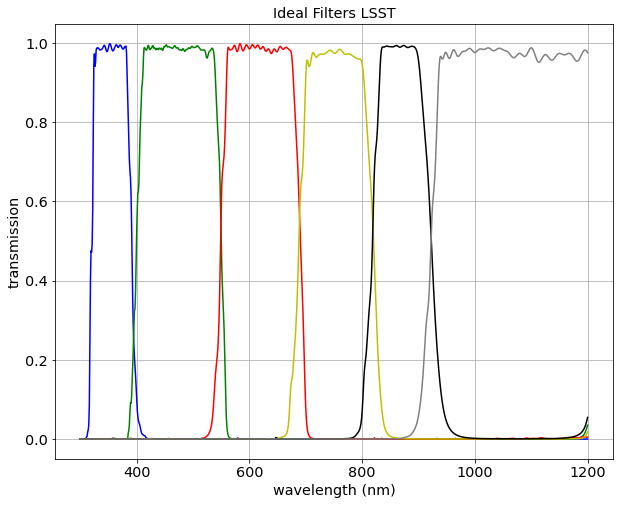

In [11]:
plt.plot(wl_u,u,'b-')
plt.plot(wl_g,g,'g-')
plt.plot(wl_r,r,'r-')
plt.plot(wl_i,i,'y-')
plt.plot(wl_z,z,'k-')
plt.plot(wl_y4,y4,'-',color='grey')
plt.grid()
plt.title("Ideal Filters LSST")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")

## Read Optical Thorughput and CCD

In [12]:
data_throuthput=pd.read_excel(file_lsstoptccd,skiprows=0)

/pbs/home/j/jocheval/delightenv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
data_throuthput.head()

,WL,THROUGHPUT,CCD1,CCD2
0,300,0.327075,30.0,0.300
1,301,0.337937,30.4,0.304
2,302,0.349236,30.8,0.308
3,303,0.359444,31.2,0.312
4,304,0.368626,31.6,0.316


In [14]:
data_throuthput.tail()

,WL,THROUGHPUT,CCD1,CCD2
896,1196,0.846457,2.0,0.02
897,1197,0.846416,2.0,0.02
898,1198,0.846760,2.0,0.02
899,1199,0.844010,2.0,0.02
900,1200,0.844661,2.0,0.02


In [15]:
wl2=data_throuthput["WL"]
throughput=data_throuthput["THROUGHPUT"]
ccdqe=data_throuthput["CCD2"]
trans_opt_elec=data_throuthput["THROUGHPUT"]*data_throuthput["CCD2"]

In [16]:
trans_opt_elec_u=trans_opt_elec[0:u.shape[0]]
trans_opt_elec_g=trans_opt_elec[0:g.shape[0]]
trans_opt_elec_r=trans_opt_elec[0:r.shape[0]]
trans_opt_elec_i=trans_opt_elec[0:i.shape[0]]
trans_opt_elec_z=trans_opt_elec[0:z.shape[0]]
trans_opt_elec_y4=trans_opt_elec[0:y4.shape[0]]

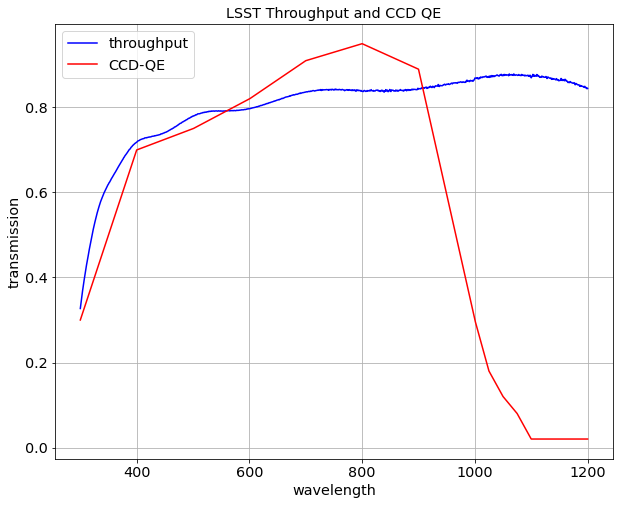

In [17]:
plt.plot(data_throuthput["WL"],data_throuthput["THROUGHPUT"],'b-',label='throughput')
plt.plot(data_throuthput["WL"],data_throuthput["CCD2"],'r-',label='CCD-QE')
plt.grid()
plt.title("LSST Throughput and CCD QE")
plt.xlabel("wavelength")
plt.ylabel("transmission")
plt.legend()

# Combine filter and optics and detector transmission 

In [18]:
tot_u=u*trans_opt_elec_u
tot_g=g*trans_opt_elec_g
tot_r=r*trans_opt_elec_r
tot_i=i*trans_opt_elec_i
tot_z=z*trans_opt_elec_z
tot_y4=y4*trans_opt_elec_y4

### Delight Filters

In [19]:
delightFiltersRoot='/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/Delight/desc-dc2/tmp/data/FILTERS/'
files_delightfilters=[delightFiltersRoot+'DC2LSST_u.res', delightFiltersRoot+'DC2LSST_g.res',\
                      delightFiltersRoot+'DC2LSST_r.res', delightFiltersRoot+'DC2LSST_i.res',\
                      delightFiltersRoot+'DC2LSST_z.res', delightFiltersRoot+'DC2LSST_y.res']
NBFILESDEL=len(files_delightfilters)
delight_u=np.loadtxt(files_delightfilters[0],skiprows=1)
delight_g=np.loadtxt(files_delightfilters[1],skiprows=1)
delight_r=np.loadtxt(files_delightfilters[2],skiprows=1)
delight_i=np.loadtxt(files_delightfilters[3],skiprows=1)
delight_z=np.loadtxt(files_delightfilters[4],skiprows=1)
delight_y=np.loadtxt(files_delightfilters[5],skiprows=1)
wlDel_u=delight_u[:,0] / 10
uDel=delight_u[:,1]
print(uDel.shape)
print("wavelength = {} A = {} nm".format(delight_u[200,0], wlDel_u[200]))
#
wlDel_g=delight_g[:,0] / 10
gDel=delight_g[:,1]
print(gDel.shape)
#
wlDel_r=delight_r[:,0] / 10
rDel=delight_r[:,1]
print(rDel.shape)
#
wlDel_i=delight_i[:,0] / 10
iDel=delight_i[:,1]
print(iDel.shape)
#
wlDel_z=delight_z[:,0] / 10
zDel=delight_z[:,1]
print(zDel.shape)
#
wlDel_y=delight_y[:,0] / 10
yDel=delight_y[:,1]
print(yDel.shape)

(8501,)
wavelength = 3200.0 A = 320.0 nm
(8501,)
(8501,)
(8501,)
(8501,)
(8501,)


### LEPHARE LSST filters

In [23]:
lePhareFiltersRoot='/pbs/throng/lsst/users/jocheval/MYLEPHARE/LEPHARE/filt/'
#ext='.dat'
ext='.pb'

convFact = 1.0
nHead=7
if ext == '.pb':
    convFact=10.0 ## wavelength given in A in the .pb file, as specified by LEPHARE doc
    nHead=0
    
files_lepharefilters=[lePhareFiltersRoot+'lsst_baseline/total_u'+ext, lePhareFiltersRoot+'lsst_baseline/total_g'+ext,\
                      lePhareFiltersRoot+'lsst_baseline/total_r'+ext, lePhareFiltersRoot+'lsst_baseline/total_i'+ext,\
                      lePhareFiltersRoot+'lsst_baseline/total_z'+ext, lePhareFiltersRoot+'lsst_baseline/total_y'+ext]
NBFILESPHA=len(files_lepharefilters)
lePhare_u=np.loadtxt(files_lepharefilters[0],skiprows=nHead)
lePhare_g=np.loadtxt(files_lepharefilters[1],skiprows=nHead)
lePhare_r=np.loadtxt(files_lepharefilters[2],skiprows=nHead)
lePhare_i=np.loadtxt(files_lepharefilters[3],skiprows=nHead)
lePhare_z=np.loadtxt(files_lepharefilters[4],skiprows=nHead)
lePhare_y4=np.loadtxt(files_lepharefilters[5],skiprows=nHead)

lePhare_atmStd=np.loadtxt(lePhareFiltersRoot+'lsst_baseline/atmos_std.dat',skiprows=4)
wlPha_atm=lePhare_atmStd[:,0]
atmPha=lePhare_atmStd[:,1]
print(atmPha.shape)

wlPha_u=lePhare_u[:,0] / convFact
uPha=lePhare_u[:,1]
print(uPha.shape)
print("wavelength = {} A = {} nm".format(lePhare_u[200,0], wlPha_u[200]))
#
wlPha_g=lePhare_g[:,0] / convFact
gPha=lePhare_g[:,1]
print(gPha.shape)
#
wlPha_r=lePhare_r[:,0] / convFact
rPha=lePhare_r[:,1]
print(rPha.shape)
#
wlPha_i=lePhare_i[:,0] / convFact
iPha=lePhare_i[:,1]
print(iPha.shape)
#
wlPha_z=lePhare_z[:,0] / convFact
zPha=lePhare_z[:,1]
print(zPha.shape)
#
wlPha_y4=lePhare_y4[:,0] / convFact
y4Pha=lePhare_y4[:,1]
print(y4Pha.shape)

(8501,)
(300,)
wavelength = 4000.0 A = 400.0 nm
(500,)
(600,)
(600,)
(600,)
(600,)


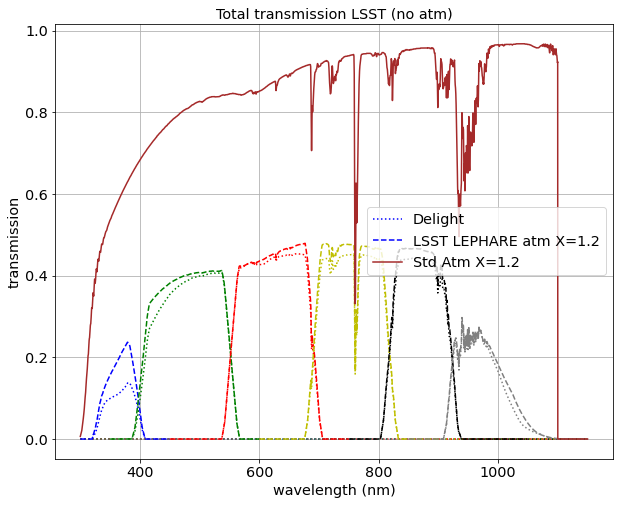

In [25]:
#plt.plot(wl_u,tot_u,'b-', label="LSST no atm")
#plt.plot(wl_g,tot_g,'g-')
#plt.plot(wl_r,tot_r,'r-')
#plt.plot(wl_i,tot_i,'y-')
#plt.plot(wl_z,tot_z,'k-')
#plt.plot(wl_y4,tot_y4,'-',color='grey')
plt.plot(wlDel_u, uDel,'b:', label="Delight")
plt.plot(wlDel_g, gDel,'g:')
plt.plot(wlDel_r, rDel,'r:')
plt.plot(wlDel_i, iDel,'y:')
plt.plot(wlDel_z, zDel,'k:')
plt.plot(wlDel_y, yDel,':',color='grey')
plt.plot(wlPha_u, uPha,'b--', label="LSST LEPHARE atm X=1.2")
plt.plot(wlPha_g, gPha,'g--')
plt.plot(wlPha_r, rPha,'r--')
plt.plot(wlPha_i, iPha,'y--')
plt.plot(wlPha_z, zPha,'k--')
plt.plot(wlPha_y4, y4Pha,'--',color='grey')
plt.plot(wlPha_atm, atmPha, color='brown', label="Std Atm X=1.2")
#plt.plot(wl_u,tot_u*atmPha, color='brown', ls='--', label="LSST * stdAtm")
#plt.plot(wl_g,tot_g*atmPha, color='brown',ls='--')
#plt.plot(wl_r,tot_r*atmPha, color='brown',ls='--')
#plt.plot(wl_i,tot_i*atmPha, color='brown',ls='--')
#plt.plot(wl_z,tot_z*atmPha, color='brown',ls='--')
#plt.plot(wl_y4,tot_y4*atmPha, color='brown',ls='--')
plt.grid()
plt.legend()
plt.title("Total transmission LSST (no atm)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("lsst-total-transm.png")

## Comparaison des SED CWW entre Delight et LEPHARE

In [45]:
#delightSEDsRoot='/home/photoz/Intern2022_PhotoZ/Delight/data/'
delightSEDsRoot='/home/photoz/Intern2022_PhotoZ/Delight/desc-dc2/tmp/data/'
#ext='.dat'
ext='.sed'
files_delightSEDs=[delightSEDsRoot+'CWW_SEDs/El_B2004a'+ext,\
                   delightSEDsRoot+'CWW_SEDs/Im_B2004a'+ext,\
                   delightSEDsRoot+'CWW_SEDs/SB2_B2004a'+ext,\
                   delightSEDsRoot+'CWW_SEDs/SB3_B2004a'+ext,\
                   delightSEDsRoot+'CWW_SEDs/Sbc_B2004a'+ext,\
                   delightSEDsRoot+'CWW_SEDs/Scd_B2004a'+ext,\
                   delightSEDsRoot+'CWW_SEDs/ssp_5Myr_z008'+ext,\
                   delightSEDsRoot+'CWW_SEDs/ssp_25Myr_z008'+ext\
                  ]
NBSEDDEL=len(files_delightSEDs)
delight_El=np.loadtxt(files_delightSEDs[0],skiprows=0)
delight_Im=np.loadtxt(files_delightSEDs[1],skiprows=0)
delight_SB2=np.loadtxt(files_delightSEDs[2],skiprows=0)
delight_SB3=np.loadtxt(files_delightSEDs[3],skiprows=0)
delight_Sbc=np.loadtxt(files_delightSEDs[4],skiprows=0)
delight_Scd=np.loadtxt(files_delightSEDs[5],skiprows=0)
delight_ssp5=np.loadtxt(files_delightSEDs[6],skiprows=0)
delight_ssp25=np.loadtxt(files_delightSEDs[7],skiprows=0)

wlDel_El=delight_El[:,0]
ElDel=delight_El[:,1]
print(ElDel.shape)
#
wlDel_Im=delight_Im[:,0]
ImDel=delight_Im[:,1]
print(ImDel.shape)
#
wlDel_SB2=delight_SB2[:,0]
SB2Del=delight_SB2[:,1]
print(SB2Del.shape)
#
wlDel_SB3=delight_SB3[:,0]
SB3Del=delight_SB3[:,1]
print(SB3Del.shape)
#
wlDel_Sbc=delight_Sbc[:,0]
SbcDel=delight_Sbc[:,1]
print(SbcDel.shape)
#
wlDel_Scd=delight_Scd[:,0]
ScdDel=delight_Scd[:,1]
print(ScdDel.shape)
#
wlDel_ssp5=delight_ssp5[:,0]
ssp5Del=delight_ssp5[:,1]
print(ssp5Del.shape)
#
wlDel_ssp25=delight_ssp25[:,0]
ssp25Del=delight_ssp25[:,1]
print(ssp25Del.shape)

(1782,)
(1782,)
(2942,)
(2802,)
(1782,)
(1782,)
(6900,)
(6900,)


In [46]:
lePhareSEDsRoot='/home/photoz/MYLEPHARE/LEPHARE/sed/GAL/'
files_lePhareSEDs=[lePhareSEDsRoot+'CWW_KINNEY/CWW_E_ext.sed',\
                   lePhareSEDsRoot+'CWW_KINNEY/CWW_Im_ext.sed',\
                   lePhareSEDsRoot+'CWW_KINNEY/KIN_SB2_ext.sed',\
                   lePhareSEDsRoot+'CWW_KINNEY/KIN_SB3_ext.sed',\
                   lePhareSEDsRoot+'CWW_KINNEY/CWW_Sbc_ext.sed',\
                   lePhareSEDsRoot+'CWW_KINNEY/CWW_Scd_ext.sed',\
                   #lePhareSEDsRoot+'CWW_KINNEY/ssp_5Myr_ext.sed',\
                   #lePhareSEDsRoot+'CWW_KINNEY/ssp_25Myr_ext.sed'\
                  ]
NBSEDPHA=len(files_lePhareSEDs)
lePhare_El=np.loadtxt(files_lePhareSEDs[0],skiprows=0)
lePhare_Im=np.loadtxt(files_lePhareSEDs[1],skiprows=0)
lePhare_SB2=np.loadtxt(files_lePhareSEDs[2],skiprows=0)
lePhare_SB3=np.loadtxt(files_lePhareSEDs[3],skiprows=0)
lePhare_Sbc=np.loadtxt(files_lePhareSEDs[4],skiprows=0)
lePhare_Scd=np.loadtxt(files_lePhareSEDs[5],skiprows=0)
#lePhare_ssp5=np.loadtxt(files_lePhareSEDs[6],skiprows=0)
#lePhare_ssp25=np.loadtxt(files_lePhareSEDs[7],skiprows=0)

wlPha_El=lePhare_El[:,0]
ElPha=lePhare_El[:,1]
print(ElPha.shape)
#
wlPha_Im=lePhare_Im[:,0]
ImPha=lePhare_Im[:,1]
print(ImPha.shape)
#
wlPha_SB2=lePhare_SB2[:,0]
SB2Pha=lePhare_SB2[:,1]
print(SB2Pha.shape)
#
wlPha_SB3=lePhare_SB3[:,0]
SB3Pha=lePhare_SB3[:,1]
print(SB3Pha.shape)
#
wlPha_Sbc=lePhare_Sbc[:,0]
SbcPha=lePhare_Sbc[:,1]
print(SbcPha.shape)
#
wlPha_Scd=lePhare_Scd[:,0]
ScdPha=lePhare_Scd[:,1]
print(ScdPha.shape)
#
#wlPha_ssp5=lePhare_ssp5[:,0]
#ssp5Pha=lePhare_ssp5[:,1]
#print(ssp5Pha.shape)
#
#wlPha_ssp25=lePhare_ssp25[:,0]
#ssp25Pha=lePhare_ssp25[:,1]
#print(ssp25Pha.shape)

(697,)
(701,)
(2422,)
(2422,)
(698,)
(698,)


In [50]:
files_lePhareSEDsCosmos=[lePhareSEDsRoot+'COSMOS_SED/Ell1_A_0.sed',\
                   lePhareSEDsRoot+'COSMOS_SED/SB2_A_0.sed',\
                   lePhareSEDsRoot+'COSMOS_SED/SB3_A_0.sed',\
                   lePhareSEDsRoot+'COSMOS_SED/Sb_A_0.sed',\
                   lePhareSEDsRoot+'COSMOS_SED/Sc_A_0.sed',\
                   lePhareSEDsRoot+'COSMOS_SED/Sd_A_0.sed',\
                   #lePhareSEDsRoot+'CWW_KINNEY/ssp_5Myr_ext.sed',\
                   #lePhareSEDsRoot+'CWW_KINNEY/ssp_25Myr_ext.sed'\
                  ]
NBSEDPHACOSM=len(files_lePhareSEDsCosmos)
lePhare_CosmosEl=np.loadtxt(files_lePhareSEDsCosmos[0],skiprows=0)
lePhare_CosmosSB2=np.loadtxt(files_lePhareSEDsCosmos[1],skiprows=0)
lePhare_CosmosSB3=np.loadtxt(files_lePhareSEDsCosmos[2],skiprows=0)
lePhare_CosmosSb=np.loadtxt(files_lePhareSEDsCosmos[3],skiprows=0)
lePhare_CosmosSc=np.loadtxt(files_lePhareSEDsCosmos[4],skiprows=0)
lePhare_CosmosSd=np.loadtxt(files_lePhareSEDsCosmos[5],skiprows=0)
#lePhare_ssp5=np.loadtxt(files_lePhareSEDs[6],skiprows=0)
#lePhare_ssp25=np.loadtxt(files_lePhareSEDs[7],skiprows=0)

wlPha_CosmosEl=lePhare_CosmosEl[:,0]
CosmosElPha=lePhare_CosmosEl[:,1]
print(CosmosElPha.shape)
#
wlPha_CosmosSB2=lePhare_CosmosSB2[:,0]
CosmosSB2Pha=lePhare_CosmosSB2[:,1]
print(CosmosSB2Pha.shape)
#
wlPha_CosmosSB3=lePhare_CosmosSB3[:,0]
CosmosSB3Pha=lePhare_CosmosSB3[:,1]
print(CosmosSB3Pha.shape)
#
wlPha_CosmosSb=lePhare_CosmosSb[:,0]
CosmosSbPha=lePhare_CosmosSb[:,1]
print(CosmosSbPha.shape)
#
wlPha_CosmosSc=lePhare_CosmosSc[:,0]
CosmosScPha=lePhare_CosmosSc[:,1]
print(CosmosScPha.shape)
#
wlPha_CosmosSd=lePhare_CosmosSd[:,0]
CosmosSdPha=lePhare_CosmosSd[:,1]
print(CosmosSdPha.shape)

(1762,)
(1762,)
(1762,)
(1762,)
(1762,)
(1762,)


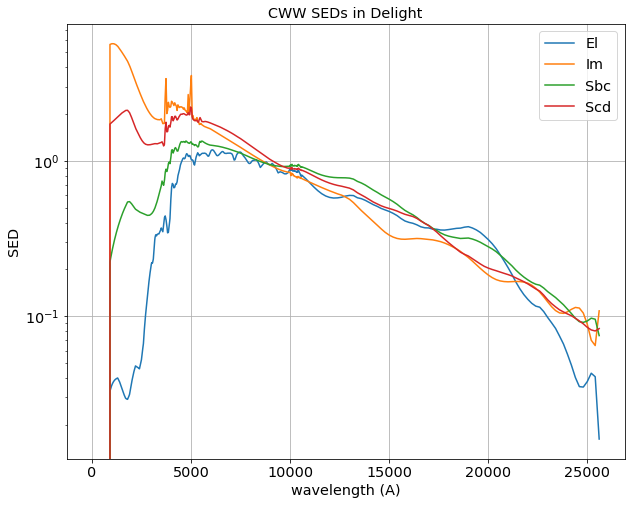

In [47]:
plt.plot(wlDel_El, ElDel, label="El")
plt.plot(wlDel_Im, ImDel, label="Im")
#plt.plot(wlDel_SB2, SB2Del, label="SB2")
#plt.plot(wlDel_SB3, SB3Del, label="SB3")
plt.plot(wlDel_Sbc, SbcDel, label="Sbc")
plt.plot(wlDel_Scd, ScdDel, label="Scd")
#plt.plot(wlDel_ssp5, ssp5Del,':', label="ssp 5My")
#plt.plot(wlDel_ssp25, ssp25Del,':', label="ssp 25My")
plt.grid()
plt.legend()
plt.title("CWW SEDs in Delight")
plt.xlabel("wavelength (A)")
plt.ylabel("SED")
plt.yscale('log')
#plt.savefig("lsst-total-transm.png")

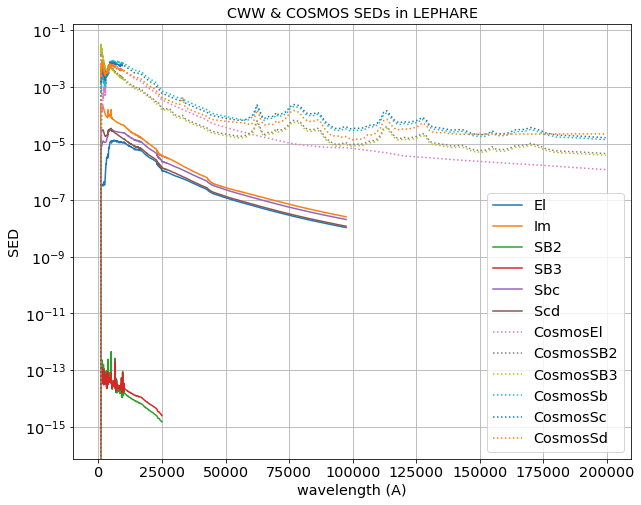

In [53]:
plt.plot(wlPha_El, ElPha, label="El")
plt.plot(wlPha_Im, ImPha, label="Im")
plt.plot(wlPha_SB2, SB2Pha, label="SB2")
plt.plot(wlPha_SB3, SB3Pha, label="SB3")
plt.plot(wlPha_Sbc, SbcPha, label="Sbc")
plt.plot(wlPha_Scd, ScdPha, label="Scd")

plt.plot(wlPha_CosmosEl, CosmosElPha, label="CosmosEl", ls=':')
plt.plot(wlPha_CosmosSB2, CosmosSB2Pha, label="CosmosSB2", ls=':')
plt.plot(wlPha_CosmosSB3, CosmosSB3Pha, label="CosmosSB3", ls=':')
plt.plot(wlPha_CosmosSb, CosmosSbPha, label="CosmosSb", ls=':')
plt.plot(wlPha_CosmosSc, CosmosScPha, label="CosmosSc", ls=':')
plt.plot(wlPha_CosmosSd, CosmosSdPha, label="CosmosSd", ls=':')
#plt.axis(xmax=np.max(wlDel_El))
plt.grid()
plt.legend()
plt.title("CWW & COSMOS SEDs in LEPHARE")
plt.xlabel("wavelength (A)")
plt.ylabel("SED")
plt.yscale('log')
#plt.savefig("lsst-total-transm.png")

### Rescaling

In [29]:
c0=2.99792458e8 ## m/s
h=6.62607015e-34 ## J.s
stop=False
indDel=-1

for lambdaDel in wlDel_El:
    indDel+=1
    indPha=-1
    for lambdaPha in wlPha_El:
        indPha+=1
        stop = (lambdaDel != 0) and (lambdaPha == lambdaDel)
        if stop:
            break
    if stop:
        break
print(indDel, indPha, lambdaDel, lambdaPha)

fact= ElDel[indDel]/ElPha[indPha]
diff= ElDel[indDel]*lambdaDel/(c0*1.0e10) - ElPha[indPha]/lambdaPha
print(fact, (lambdaPha**2)/(c0*1e10), diff)

verif=np.max(ElDel)/np.max(ElPha)
lambdaMaxPha=wlPha_El[np.argmax(ElPha)]
lambdaMaxDel=wlDel_El[np.argmax(ElDel)]
dverif=np.max(ElDel)*lambdaMaxDel/(c0*1.0e10) - np.max(ElPha)/lambdaMaxPha
print(lambdaMaxPha, lambdaMaxDel, verif, (lambdaMaxPha**2)/(c0*1e10), dverif)

7 2 912.0 912.0
141198.12018156424 2.774399347964918e-13 -2.559385864650902e-10
6060.0 6060.0 88969.27024377359 1.2249674406418856e-11 -2.186466263953655e-09


Rescaling factors - El: 1.1239835926045307e-05, Im: 4.304781307141915e-05, Sbc: 2.3941443909465732e-05, Scd: 1.557503668275274e-05


Text(0, 0.5, 'log(SED)')

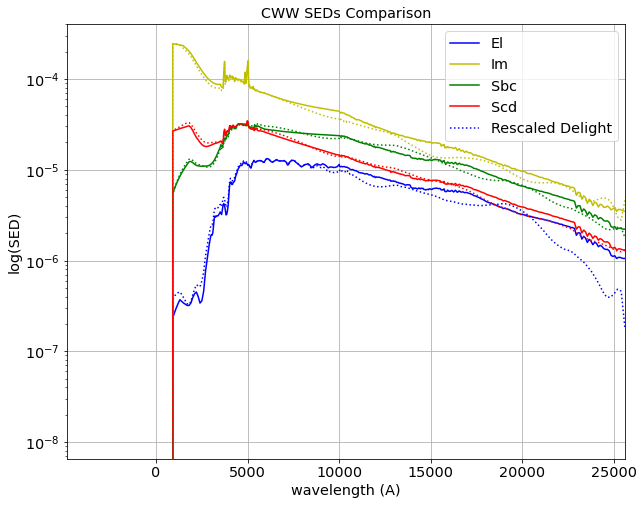

In [44]:
plt.plot(wlPha_El, ElPha, color='b', label="El")
plt.plot(wlPha_Im, ImPha, color='y', label="Im")
#plt.plot(wlPha_SB2, SB2Pha, color='', label="SB2")
#plt.plot(wlPha_SB3, SB3Pha, color='', label="SB3")
plt.plot(wlPha_Sbc, SbcPha, color='g', label="Sbc")
plt.plot(wlPha_Scd, ScdPha, color='r', label="Scd")

#plt.plot(wlDel_El, ElDel*wlDel_El/(c0*1.0e10*h*1.0e7), color='b', ls=':', label="Rescaled Delight")
#plt.plot(wlDel_Im, ImDel*wlDel_Im/(c0*1.0e10*h*1.0e7), color='y', ls=':')
##plt.plot(wlDel_SB2, SB2Del*wlDel_SB2/(c0*1.0e10*h*1.0e7), color='', ls=':')
##plt.plot(wlDel_SB3, SB3Del*wlDel_SB3/(c0*1.0e10*h*1.0e7), color='', ls=':')
#plt.plot(wlDel_Sbc, SbcDel*wlDel_Sbc/(c0*1.0e10*h*1.0e7), color='g', ls=':')
#plt.plot(wlDel_Scd, ScdDel*wlDel_Scd/(c0*1.0e10*h*1.0e7), color='r', ls=':')

plt.plot(wlDel_El, ElDel*np.max(ElPha)/np.max(ElDel), color='b', ls=':', label="Rescaled Delight")
plt.plot(wlDel_Im, ImDel*np.max(ImPha)/np.max(ImDel), color='y', ls=':')
#plt.plot(wlDel_SB2, SB2Del*1.0e-5, color='', ls=':')
#plt.plot(wlDel_SB3, SB3Del*1.0e-5, color='', ls=':')
plt.plot(wlDel_Sbc, SbcDel*np.max(SbcPha)/np.max(SbcDel), color='g', ls=':')
plt.plot(wlDel_Scd, ScdDel*np.max(ScdPha)/np.max(ScdDel), color='r', ls=':')
print("Rescaling factors - El: {}, Im: {}, Sbc: {}, Scd: {}".format(np.max(ElPha)/np.max(ElDel),\
                                                                    np.max(ImPha)/np.max(ImDel),\
                                                                    np.max(SbcPha)/np.max(SbcDel),\
                                                                    np.max(ScdPha)/np.max(ScdDel)\
                                                                   )
     )

plt.yscale('log')
#plt.xscale('log')
plt.axis(xmax=np.max(wlDel_El))
plt.grid()
plt.legend()
plt.title("CWW SEDs Comparison")
plt.xlabel("wavelength (A)")
plt.ylabel("log(SED)")
#plt.savefig("lsst-total-transm.png")